<a href="https://colab.research.google.com/github/drshahizan/SECP3843/blob/main/submission/Terence172/question4/files/code/Question4_STDE_AA_TerenceLoorthanathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive First... Upload the tweets dataset in here as well

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change file_path accordingly and run the code
- Note: I imported new_data.json earlier into my drive

In [7]:
import json

file_path = '/content/drive/MyDrive/Personal/new_data.json'

with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]


## Preparing the Data

Step 1) Installing Dependencies

In [1]:
!pip install nltk

Step 2) Import all required libraries

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 3) Data preprocessing and lemmatization

In [16]:

def preprocess_data(text):

    # Remove non-English characters, URLs, hashtags, and emojis from the tweet.
    non_english_characters = re.compile(r'[^\x00-\x7F]')
    url_pattern = re.compile(r'http\S+|www\S+')
    hashtag_pattern = re.compile(r'#\S+')
    emoji_pattern = re.compile(r'[^\w\s]|_')

    text = non_english_characters.sub('', text)
    text = url_pattern.sub('', text)
    text = hashtag_pattern.sub('', text)
    text = emoji_pattern.sub('', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens


preprocessed_data = [preprocess_data(tweet['text']) for tweet in data[0]]

# Print original and preprocessed text for a few tweets
for i in range(10):
    print("Original Text:", data[0][i]['text'])
    print("Preprocessed Tokens:", preprocessed_data[i])
    print()


Original Text: eu preciso de terminar de fazer a minha tabela, está muito foda **
Preprocessed Tokens: ['eu', 'preciso', 'de', 'terminar', 'de', 'fazer', 'minha', 'tabela', 'est', 'muito', 'foda']

Original Text: I can't wait for #BoardwalkEmpire
Preprocessed Tokens: ['cant', 'wait']

Original Text: Oky nenek nya RT @wikigehol: Oky jd anak na yyyy RT @okyoktaaaaa: Papanya asil yaaa ;;) RT @cacaamarisa: Eh @wikigehol tidur sana! Udah male
Preprocessed Tokens: ['oky', 'nenek', 'nya', 'rt', 'wikigehol', 'oky', 'jd', 'anak', 'na', 'yyyy', 'rt', 'okyoktaaaaa', 'papanya', 'asil', 'yaaa', 'rt', 'cacaamarisa', 'eh', 'wikigehol', 'tidur', 'sana', 'udah', 'male']

Original Text: ど う で も い い
Preprocessed Tokens: []

Original Text: @AdmireBiebs what ya think about to change my name to @NickJMunroC? I want one with them both. they're my imaginary husbands :P
Preprocessed Tokens: ['admirebiebs', 'ya', 'think', 'change', 'name', 'nickjmunroc', 'want', 'one', 'theyre', 'imaginary', 'husband', 'p']

Or

## Preparing to Train the Model

Step 1) Importing Dependencies

In [21]:
from sklearn.model_selection import train_test_split
from textblob import TextBlob

Step 2) Split the preprocessed data into the feature (X) and target (y) variables

In [22]:
def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis using TextBlob
sentiments = [analyze_sentiment(' '.join(tokens)) for tokens in preprocessed_data]

# 20% Test 80 for train
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, sentiments, test_size=0.2, random_state=42)

In [30]:
print()
print("Train Dataset")

for i in range(10):
    print("Text:", X_train[i])
    print("Sentiment:", y_train[i])

print()
print("Test Dataset")

for i in range(10):
    print("Text:", X_test[i])
    print("Sentiment:", y_test[i])


Train Dataset
Text: xgreendaysgirl aww nono sorry prob xd im crazy nightxdxd
Sentiment: negative
Text: rt monavieluxembo hotel palace berlin
Sentiment: neutral
Text: chi c silenzioditomba
Sentiment: neutral
Text: regal union square stadium 14 pro good selection movie major release minii
Sentiment: positive
Text: trip4josey thank god
Sentiment: neutral
Text: biieberbrazil 3
Sentiment: neutral
Text: lauralovestompx thanks babe everyone follow laura shes lovleyxxxx
Sentiment: positive
Text: rt esthetics402 september special 60 minute swedish massage 50 raindrop massage 50tweet schedule day relaxation
Sentiment: positive
Text: detalhe computador dando erro de novo affff
Sentiment: neutral
Text: odiariodebrunaj alm de que ela j disse que vai acreditei nela desmentindo e seria um grande nome
Sentiment: neutral

Test Dataset
Text: shanedawson hi shane ddddd
Sentiment: neutral
Text: mrscullen yeah nod
Sentiment: neutral
Text: ortizdrfc dude ive able 2 year kidding
Sentiment: positive
Text: su

## Train & Evaluate the Naive Bayes Model

1) Importing Dependencies

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

2) Train & Evaluate the Naive Bayes Model

In [32]:
# Vectorise
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test_vectorized)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print()
print("Classification Report:\n", report)

Accuracy: 0.8010871753573585
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.22      0.35       372
     neutral       0.95      0.83      0.89      3463
    positive       0.55      0.91      0.68      1132

    accuracy                           0.80      4967
   macro avg       0.79      0.65      0.64      4967
weighted avg       0.86      0.80      0.80      4967



## Visualising the Dataset & Performance of the Model

1) Importing Dependencies

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize

Chart 1 : Pie Chart for the Data, Showing Distribution of Sentiments

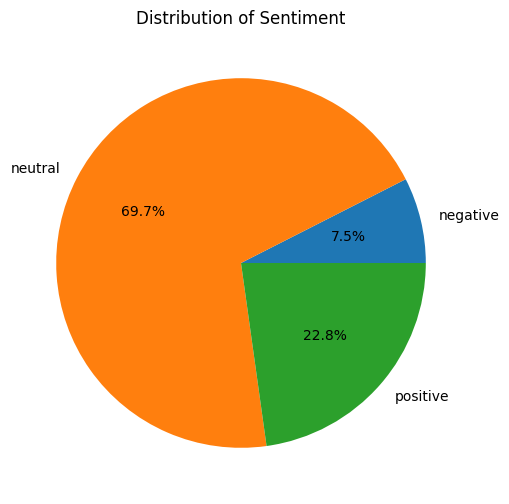

In [44]:
labels = unique_labels(y_test)
sizes = [y_test.count(label) for label in labels]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Sentiment")
plt.show()

Chart 2 : Bar Chart to visualise the Data, Showing Distribution of Sentiments


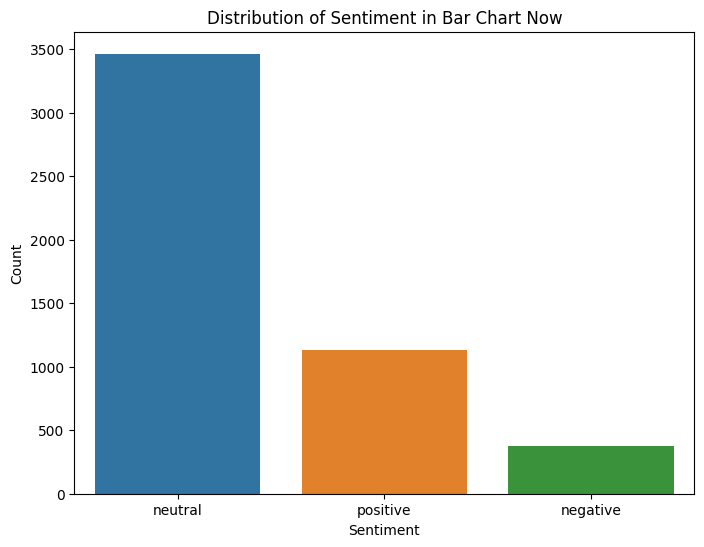

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment in Bar Chart Now")
plt.show()

Chart 3 : Confusion Matrix, To show how well the model did

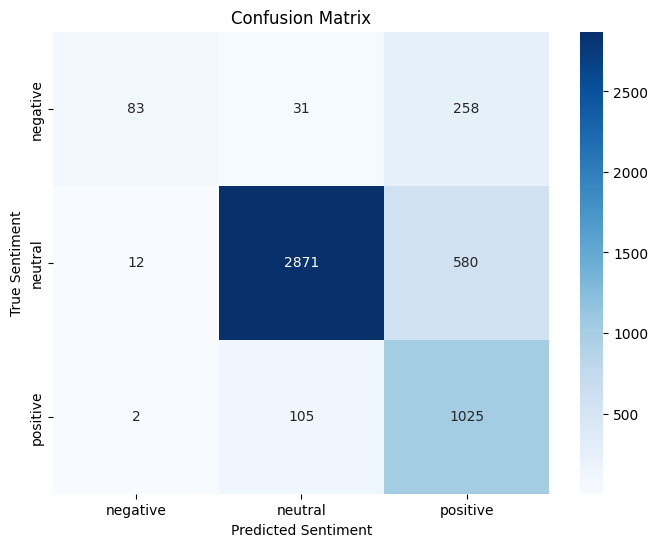

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix")
plt.show()

Chart 4 : Precision-Recall Curve for Sentiment, To show how the shows the tradeoff between precision and recall for different threshold

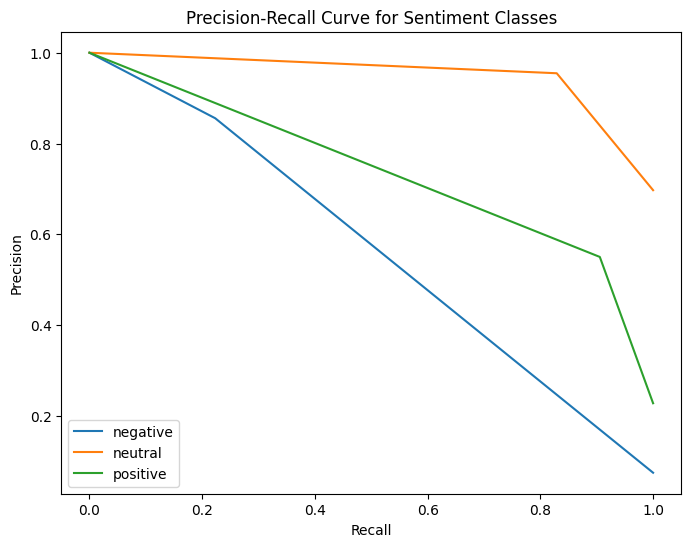

In [43]:
# Binarise
y_test_bin = label_binarize(y_test, classes=labels)
y_pred_bin = label_binarize(y_pred, classes=labels)

# Get precision and recall
precision = dict()
recall = dict()
for i, label in enumerate(labels):
    precision[label], recall[label], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])

# Precision-recall curves for all sentiments Neutral Positive Negative
plt.figure(figsize=(8, 6))
for label in labels:
    plt.plot(recall[label], precision[label], label=label)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Sentiment")
plt.legend()
plt.show()

## The End : Produced by Terence